## 목적
- 마케팅 전략 수립을 위한 고객 군집화
- 군집별 고객의 특성 파악

In [2]:
# 기본 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비
- 출처
    - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
    - 원본 데이터셋의 컬럼명을 한글화 하였음
- 단위
    - 연간소득 : 천달러
    - 소비점수 : 1~100점

In [3]:
df = pd.read_csv("data/쇼핑몰고객군집화.csv")
df.head()

,고객ID,성별,나이,연간소득,소비점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 데이터 전처리

#### 사용할 컬럼 선택

In [4]:
X = df.drop(['고객ID'], axis=1)
X.head()

,성별,나이,연간소득,소비점수
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      200 non-null    object
 1   나이      200 non-null    int64 
 2   연간소득    200 non-null    int64 
 3   소비점수    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# ---------------------------------
# 데이터 유형 구분 - 범주형/수치형
# ---------------------------------

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include='number').columns

display(cat_cols)
display(num_cols)

Index(['성별'], dtype='object')

Index(['나이', '연간소득', '소비점수'], dtype='object')

#### 범주형 데이터 인코딩

In [15]:
# -----------------
# 인코더 생성
# -----------------

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# -----------------
# 인코딩
# -----------------

X_encoded = encoder.fit_transform(X[cat_cols])
col_name = encoder.get_feature_names_out()

# -----------------
# 인코딩 결과를 데이터프레임 형태로 만들기
# -----------------

X_encoded = pd.DataFrame(X_encoded, columns=col_name)
X_encoded

,성별_Male
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
195,0.0
196,0.0
197,1.0
198,1.0


#### 수치형 데이터 스케일링

In [17]:
# -----------------
# 스케일러 생성
# -----------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# -----------------
# 스케일링
# -----------------

X_scaled = scaler.fit_transform(X[num_cols])

# -----------------
# 스케일 된 데이터를 데이터프레임 형태로 만들기
# -----------------

X_scaled = pd.DataFrame(X_scaled, columns=num_cols)
X_scaled

,나이,연간소득,소비점수
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


#### 전처리 완료된 최종 데이터

In [18]:
X_preprocessed = pd.concat([X_encoded, X_scaled], axis=1)
X_preprocessed

,성별_Male,나이,연간소득,소비점수
0,1.0,-1.424569,-1.738999,-0.434801
1,1.0,-1.281035,-1.738999,1.195704
2,0.0,-1.352802,-1.700830,-1.715913
3,0.0,-1.137502,-1.700830,1.040418
4,0.0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.0,-0.276302,2.268791,1.118061
196,0.0,0.441365,2.497807,-0.861839
197,1.0,-0.491602,2.497807,0.923953
198,1.0,-0.491602,2.917671,-1.250054


### 군집화

#### 엘보우 기법으로 클러스터의 갯수 정하기

In [23]:
# -----------------
# 이너셔 구하기
# -----------------

from sklearn.cluster import KMeans

min_cluster = 2
max_cluster = 10
random_state = 42

inertia = []

for k in range(min_cluster, max_cluster) :
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X_preprocessed)
    iner = model.inertia_
    print(f'k:{k} ==> {iner}')
    inertia.append(iner)

inertia

k:2 ==> 438.5224115567775
k:3 ==> 345.2050346991059
k:4 ==> 254.36171423484498
k:5 ==> 216.7849015165104
k:6 ==> 181.9514362434146
k:7 ==> 171.3726604894381
k:8 ==> 153.29724063982397
k:9 ==> 142.71846488584748


[438.5224115567775,
 345.2050346991059,
 254.36171423484498,
 216.7849015165104,
 181.9514362434146,
 171.3726604894381,
 153.29724063982397,
 142.71846488584748]

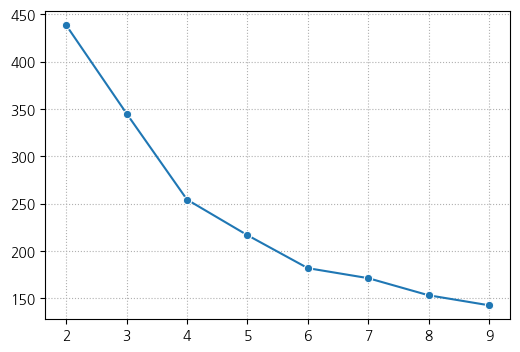

In [27]:
# -----------------
# 이너셔 시각화
# -----------------
plt.figure(figsize=(6, 4))
sns.lineplot(x=range(min_cluster, max_cluster), y=inertia, marker='o')
plt.xticks(range(min_cluster, max_cluster))
plt.grid(ls=':')

#### 실루엣 점수로 최적의 클러스터 갯수 찾기
- 실루엣 점수란?
    - 한 데이터가 자신의 클러스터 안에서는 얼마나 가깝고 다른 클러스터와는 얼마나 떨어져있는가를 측정한 값
    - 1에 가까울수록 잘 분리된 클러스터
    - 0에 가까울수록 클러스터간 경계가 애매함
    - 음수 -> 잘못된 군집 배정 가능성

In [29]:
# -----------------
# 군집 갯수에 따른 실루엣 점수
# -----------------

from sklearn.metrics import silhouette_score

for k in range(min_cluster, max_cluster) :
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X_preprocessed)
    print(f'k:{k} ==> {silhouette_score(X_preprocessed, model.labels_)}')


k:2 ==> 0.30319765641607577
k:3 ==> 0.31200836318195724
k:4 ==> 0.35044061449694197
k:5 ==> 0.34977050035201074
k:6 ==> 0.356485834425401
k:7 ==> 0.3315513749667554
k:8 ==> 0.336203797093241
k:9 ==> 0.3117853954011984


#### 학습

In [30]:
k=6

model = KMeans(n_clusters=k, random_state=random_state)

model.fit(X_preprocessed)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


### 군집분석

#### 실루엣 그래프

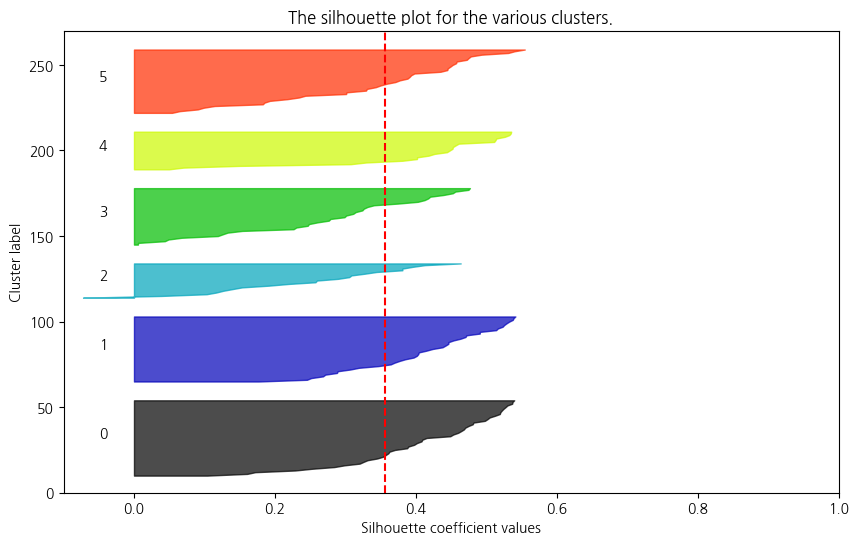

In [31]:
from silhouette_analysis import silhouette_plot

silhouette_plot(X_preprocessed, k)

#### 군집별 데이터 수

In [33]:
df['군집'] = model.labels_
df

,고객ID,성별,나이,연간소득,소비점수,군집
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [34]:
df.groupby(by='군집')['고객ID'].count()

군집
0    45
1    39
2    21
3    34
4    23
5    38
Name: 고객ID, dtype: int64

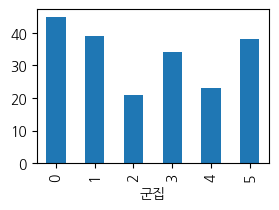

In [36]:
df.groupby(by='군집')['고객ID'].count().plot(kind='bar', figsize=(3,2))
pass

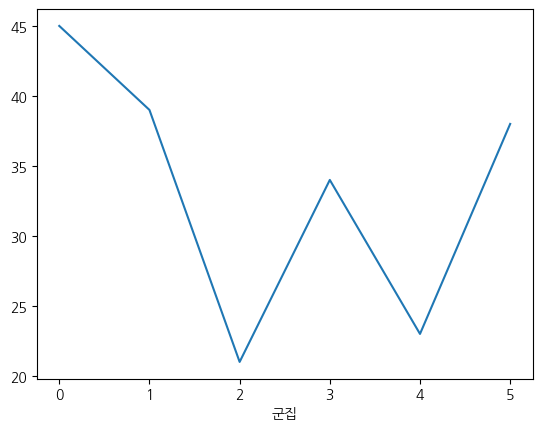

In [37]:
df.groupby(by='군집')['고객ID'].count().plot()
pass

#### 연속형 변수 시각화

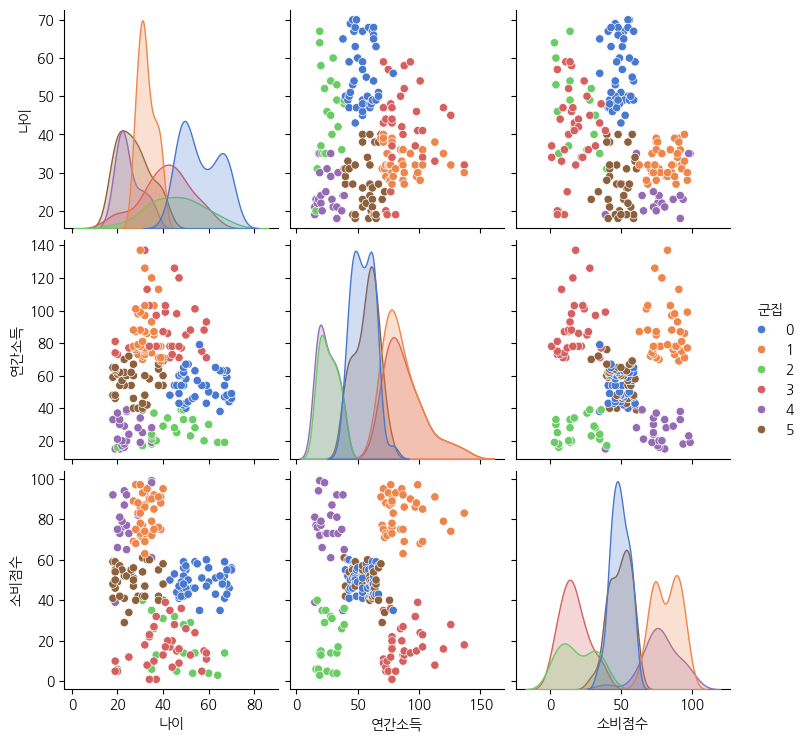

In [44]:
# -------------------
# 연속형 변수 시각화
# -------------------

sns.pairplot(df.iloc[:,1:], hue='군집', palette='muted')
pass

#### 범주형 변수 시각화

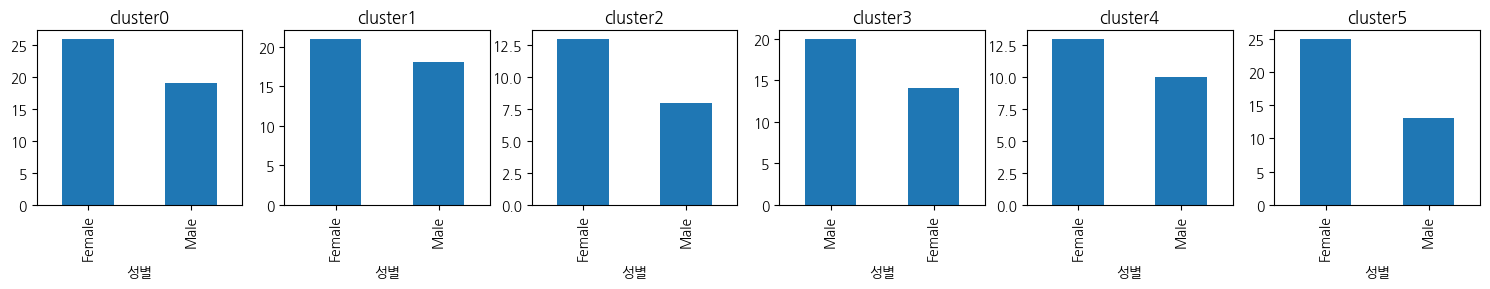

In [47]:
# -----------------------------
# 성별 빈도수 시각화
# -----------------------------

plt.figure(figsize=(15,3))

for i in range(k):
    plt.subplot(1,6,i+1)
    df.loc[df["군집"]==i, "성별"].value_counts().plot(kind="bar", title=f"cluster{i}")

plt.tight_layout()

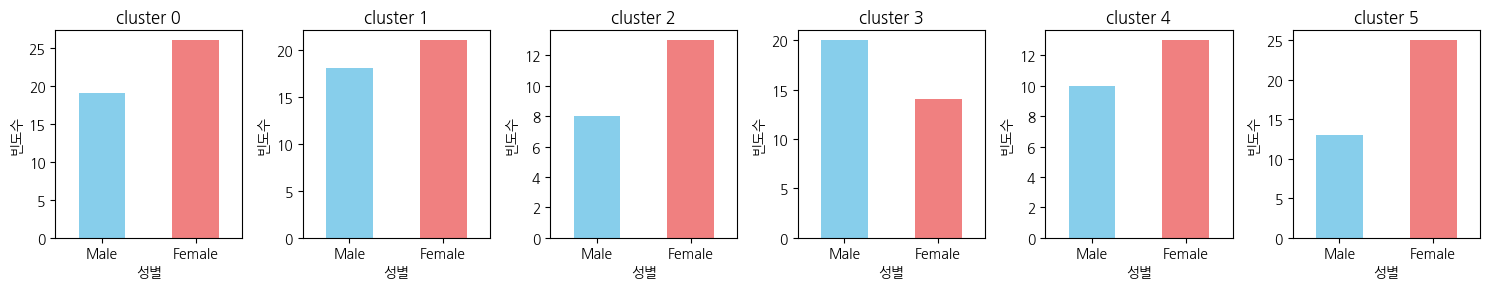

In [49]:
import matplotlib.pyplot as plt
 
# 예시: 성별 컬럼의 고정 순서 지정
order = ["Male", "Female"]  
colors = ["skyblue", "lightcoral"]
 
plt.figure(figsize=(15,3))
for i in range(k):
    plt.subplot(1,6,i+1)
   
    # 순서 고정 후 plot
    counts = df.loc[df["군집"]==i, "성별"].value_counts().reindex(order)
    counts.plot(kind="bar", color=colors, title=f"cluster {i}")
 
    plt.xlabel("성별")
    plt.ylabel("빈도수")
    plt.xticks(rotation=0)
 
plt.tight_layout()
plt.show()

#### 특성-군집 분석

In [53]:
# -----------------------------
# 클러스터별 남성의 비율
# -----------------------------

df['성별_이진'] = df['성별'].map({'Male':1, 'Female':0})

df.groupby(by='군집')['성별_이진'].mean().sort_values(ascending=False)

군집
3    0.588235
1    0.461538
4    0.434783
0    0.422222
2    0.380952
5    0.342105
Name: 성별_이진, dtype: float64

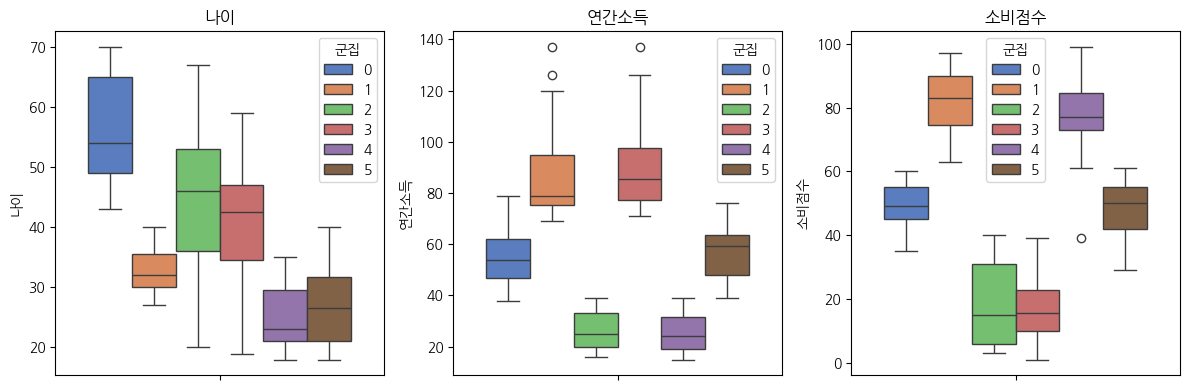

In [63]:
# -----------------------------
# "나이", "연간소득(천달러)", "소비점수(1-100)"
# -----------------------------

fig, ax = plt.subplots(1, 3, figsize=(12,4))

for i, col in enumerate(num_cols) :
    sns.boxplot(y=col, data=df, ax=ax[i], hue='군집', palette='muted')
    ax[i].set_title(col)

plt.tight_layout()

In [66]:
# -------------------
# 군집별 연령 범위
# -------------------

df.groupby(by='군집')['나이'].agg(['min','max'])

,min,max
군집,,
0,43,70
1,27,40
2,20,67
3,19,59
4,18,35
5,18,40


In [67]:
# -------------------
# 군집별 연간소득 범위 
# -------------------

df.groupby(by='군집')['연간소득'].agg(['min','max'])

,min,max
군집,,
0,38,79
1,69,137
2,16,39
3,71,137
4,15,39
5,39,76


In [68]:
# -------------------
# 군집별 소비점수 범위 
# -------------------

df.groupby(by='군집')['소비점수'].agg(['min','max'])

,min,max
군집,,
0,35,60
1,63,97
2,3,40
3,1,39
4,39,99
5,29,61


#### 군집별 특징 정리

|클러스터|0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|남성비율|0.42|0.46|0.38|**0.59**|0.43|0.34|
|연령|43~70(높음)|27~40(경제활동활발한연령)|20~67(넓게분포)|19~59(비교적넓게분포)|18~35(낮음)|18~40(낮음)|
|연간소득|38~79(중간)|69~137(높음)|16~39(낮음)|71~137(높음)|15~39(낮음)|39~76(중간)|
|소비점수|35~60(중간)|63~97(높음)|3~40(낮음)|1~39(낮음)|39~99(높음)|29~61(중간)|